# Supply Chain Analysis
This project analyzes supply chain data to identify patterns in sales, revenue, costs, and logistics efficiency.

I'll start by import the libraries and file that I'm going to use for the proyect to them give a quick look to the data


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the file
data = pd.read_csv('supply_chain_data.csv')

#Data Cleaning
data.isnull().sum()
data.info()

# Review the data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


We can see that the database consists of a record of sales of products related to the next products:

In [20]:
product_types = data['Product type'].unique()
product_types

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

The dataset consist on the records from a supply chain from 3 specifics products:
- Skincare
- Haircare
- Cosmetics

In [ ]:
Para analizar las ventas, comenzare viendo el costo promedio de estas

In [23]:
avg_cost_by_product = data.groupby('Product type')['Costs'].mean()
print(avg_cost_by_product)

Product type
cosmetics    514.092203
haircare     509.672437
skincare     555.732952
Name: Costs, dtype: float64


In [8]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


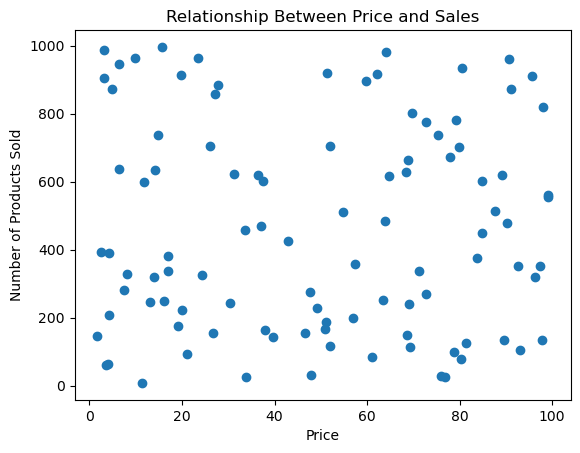

In [27]:
plt.scatter(data['Price'], data['Number of products sold'])
plt.title('Relationship Between Price and Sales')
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')
plt.show()

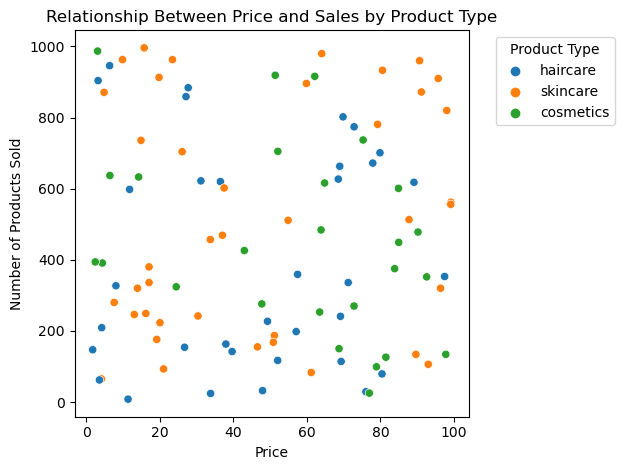

In [25]:
sns.scatterplot(data=data, x='Price', y='Number of products sold', hue='Product type')
plt.title('Relationship Between Price and Sales by Product Type')
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product Type')
plt.tight_layout()
plt.show()

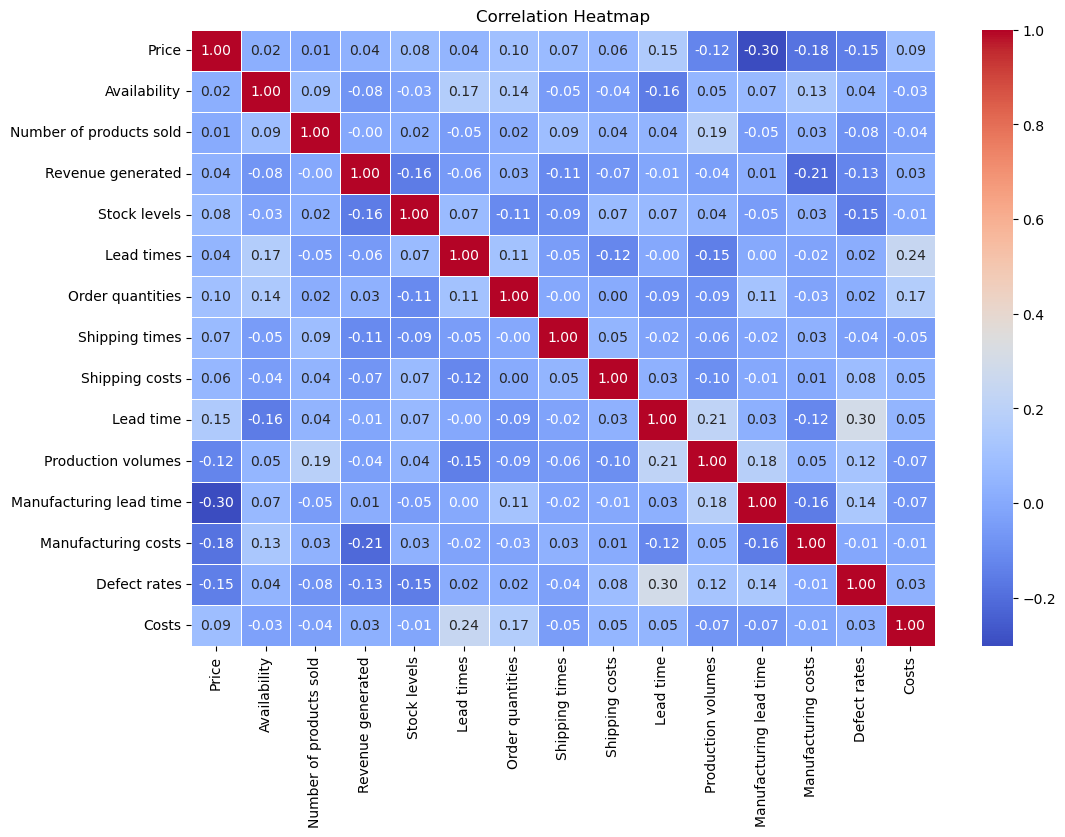

In [23]:
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titles and adjustments
plt.title('Correlation Heatmap')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictor variables and target variable
X = data[['Price', 'Availability', 'Lead times', 'Order quantities', 'Stock levels']]
y = data['Number of products sold']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Model coefficients
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

r2, np.sqrt(mse), coefficients

(-0.15104914039451667,
 331.4308037817407,
            Variable  Coefficient
 1      Availability     1.134267
 4      Stock levels     0.865320
 2        Lead times     0.438960
 0             Price     0.072346
 3  Order quantities    -0.918078)

# **Conclusion of the Supply Chain Dataset Analysis**

Throughout this exploratory and analytical process, we have examined various aspects of the dataset and attempted to identify significant patterns in sales and other relevant variables. Below, we summarize the **key findings** and **final conclusions**:

---

## **1. Relationship Between Price and Sales**
- Based on scatter plots and the heatmap, we observed **no significant correlation** between price and the number of products sold.
- This suggests that **price is not the main factor** driving sales in this dataset.

---

## **2. Exploration of Correlations Between Variables**
- The **correlation heatmap** revealed that most variables show **weak or no correlations**. The most notable correlations were:
   - **Manufacturing lead time** and **Lead time**: Moderate positive relationship.
   - **Order quantities** and **Costs**: Slight positive relationship.

- The absence of strong correlations indicates that sales and other factors might depend on **more complex relationships** or variables not included in this dataset.

---

## **3. Predictive Model for Sales**
- We built a **linear regression model** to predict sales using the following variables:
   - Price
   - Availability
   - Lead times
   - Stock levels
   - Order quantities

- **Model Results**:
   - **R²**: -0.15 → The model did not explain the variability in sales.
   - **RMSE**: 331.43 → High margin of error.

- **Conclusion**: The relationships between variables and sales are **non-linear**, suggesting that a more advanced model or variable transformation is required.

---

## **4. General Findings**
- **Availability** and **Stock levels** appear to have a more noticeable impact on sales, though the relationships are not strong.
- Variables like **Lead times** and **Order quantities** also show some influence, but the impact remains ambiguous.
- **Price does not appear to be a determining factor** in sales, which could imply that sales depend more on factors such as marketing, product quality, or distribution.

---

This analysis revealed that sales are not directly related to price, and other factors such as availability and inventory play a more significant role. However, the lack of strong linear relationships suggests that a deeper analysis with additional data and advanced models is needed.

---